<a href="https://colab.research.google.com/github/leocoloors10/EXAMEN-FINAL.Github.io/blob/main/EXAMEN%20PARCIAL%2002/Examen02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar librerías
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
dataset = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/PENGUINS/penguins.data.txt', delimiter=',')

In [3]:
dataset

array([[0.00e+00, 0.00e+00, 3.91e+01, ..., 1.81e+02, 3.75e+03, 0.00e+00],
       [0.00e+00, 0.00e+00, 3.95e+01, ..., 1.86e+02, 3.80e+03, 1.00e+00],
       [0.00e+00, 0.00e+00, 4.03e+01, ..., 1.95e+02, 3.25e+03, 1.00e+00],
       ...,
       [2.00e+00, 1.00e+00, 5.04e+01, ..., 2.22e+02, 5.75e+03, 0.00e+00],
       [2.00e+00, 1.00e+00, 4.52e+01, ..., 2.12e+02, 5.20e+03, 1.00e+00],
       [2.00e+00, 1.00e+00, 4.99e+01, ..., 2.13e+02, 5.40e+03, 0.00e+00]])

In [4]:
dataset.shape

(333, 7)

In [5]:
#Data training
X = dataset[:, 0:4]
Y = dataset[:, 4]

In [6]:
X.shape

(333, 4)

In [7]:
Y.shape

(333,)

In [8]:
Y = to_categorical(Y)

In [9]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

In [11]:
X.shape

(333, 4)

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.40)

In [13]:
# Modelo de RNA
model = Sequential()
model.add(Dense(36, input_dim=4, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(1, activation="tanh"))

In [14]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics='accuracy')

In [15]:
history = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=100)

Epoch 1/200
7/7 [==============================] - 3s 105ms/step - loss: 0.0111 - accuracy: 0.9957 - val_loss: 0.0071 - val_accuracy: 0.9957
Epoch 2/200
7/7 [==============================] - 0s 19ms/step - loss: 0.0059 - accuracy: 0.9957 - val_loss: 0.0046 - val_accuracy: 0.9957
Epoch 3/200
7/7 [==============================] - 0s 18ms/step - loss: 0.0051 - accuracy: 0.9957 - val_loss: 0.0049 - val_accuracy: 0.9957
Epoch 4/200
7/7 [==============================] - 0s 24ms/step - loss: 0.0048 - accuracy: 0.9957 - val_loss: 0.0047 - val_accuracy: 0.9957
Epoch 5/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0046 - accuracy: 0.9957 - val_loss: 0.0044 - val_accuracy: 0.9957
Epoch 6/200
7/7 [==============================] - 0s 27ms/step - loss: 0.0045 - accuracy: 0.9957 - val_loss: 0.0044 - val_accuracy: 0.9957
Epoch 7/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0044 - accuracy: 0.9957 - val_loss: 0.0044 - val_accuracy: 0.9957
Epoch 8/200
7/7 [==

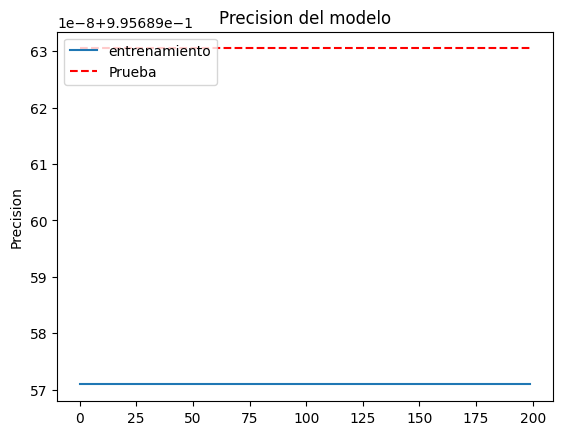

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'r--')
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.legend(['entrenamiento','Prueba'], loc='upper left')
plt.show
plt.savefig('figura01.png', dpi= 300)

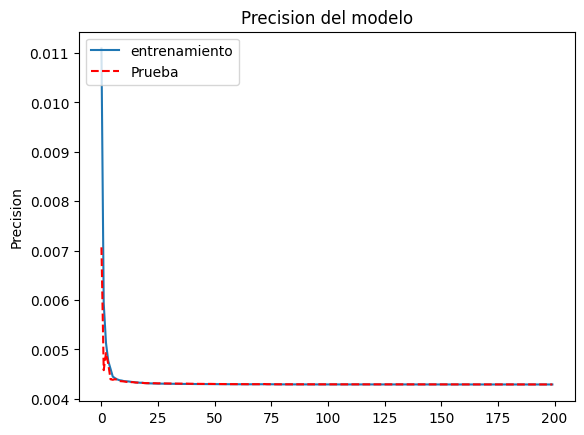

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'r--')
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.legend(['entrenamiento','Prueba'], loc='upper left')
plt.show
plt.savefig('figura01.png', dpi= 300)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                180       
                                                                 
 dense_1 (Dense)             (None, 32)                1184      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1909 (7.46 KB)
Trainable params: 1909 (7.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
